<a href="https://colab.research.google.com/github/2101327/0912/blob/main/dogvscat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt

--2022-10-04 00:43:49--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 142.250.153.101, 142.250.153.113, 142.250.153.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.153.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s49bll016j0mt16758tkah0jnh9khnkp/1664844225000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=08e32790-55f4-411d-9cd1-ac370a9211de [following]
--2022-10-04 00:43:49--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s49bll016j0mt16758tkah0jnh9khnkp/1664844225000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=08e32790-55f4-411d-9cd1-ac370a9211de
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 142.250

In [2]:
%matplotlib inline
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
from keras_preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
dir_path='/content/drive/My Drive/2022LATE'
os.makedirs(dir_path,exist_ok=True)
!pwd
!cp train.zip '/content/drive/My Drive/2022LATE'

/content


In [5]:
!cp '/content/drive/My Drive/2022LATE/train.zip'.

cp: missing destination file operand after '/content/drive/My Drive/2022LATE/train.zip.'
Try 'cp --help' for more information.


In [6]:
!unzip -o -q 'train.zip'
print('zip解凍')

zip解凍


In [7]:
model=VGG16(weights='imagenet')

553476096/553467096 [==============================] - 5s 0us/step


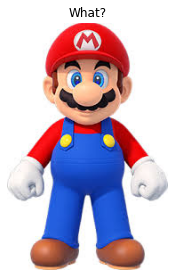

In [22]:
def showimg(filename,title,i):
  im=Image.open(filename)
  im_list=np.asarray(im)
  plt.subplot(2,5,i)
  plt.title(title)
  plt.axis('off')
  plt.imshow(im_list)
filename='MarioNSMBUDeluxe.jpg'
plt.figure(figsize=(20,10))
for i in range(1):
  showimg(filename,'What?',i+1)
plt.show()

In [23]:
def predict(filename,featuresize):
  img=image.load_img(filename,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  preds=model.predict(preprocess_input(x))
  results=decode_predictions(preds,top=featuresize)[0]
  return results
results=predict(filename,10)
for result in results:
  print(result)

('n04399382', 'teddy', 0.5319587)
('n04462240', 'toyshop', 0.18610553)
('n03720891', 'maraca', 0.0792049)
('n03255030', 'dumbbell', 0.027431097)
('n03623198', 'knee_pad', 0.023342583)
('n04023962', 'punching_bag', 0.012573384)
('n04482393', 'tricycle', 0.012472931)
('n03127747', 'crash_helmet', 0.0111064855)
('n03724870', 'mask', 0.008169034)
('n03908714', 'pencil_sharpener', 0.008024228)


In [ ]:
from pyparsing import results
def predict(filename,featuresize):
  img=image.load_img(filename,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  preds=model.predict(preprocess_input(x))
  results=decode_predictions(preds,top=featuresize)[0]
  return results
def showimg(filename,title,i):
  im=Image.open(filename)
  im_list=np.asarray(im)
  plt.subplot(2,5,i)
  plt.title(title)
  plt.axis('off')
  plt.imshow(im_list)
filename='train/cat.100.jpg'
plt.figure(figsize=(20,10))
for i in range(1):
  showimg(filename,'What?',i+1)
plt.show()
results=predict(filename,10)
for result in results:
  print(result)
filename='train/dog.8035.jpg'
plt.figure(figsize=(20,10))
for i in range(1):
  showimg(filename,'query',i+1)
plt.show()
results=predict(filename,10)
for result in results:
  print(result)
